In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\win10\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\win10\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
pip install --upgrade seaborn


In [3]:
file_path = r"C:\Users\win10\OneDrive\Desktop\CHURN_PREDICTIONS\Data\train.csv"
train = pd.read_csv(file_path)

In [4]:
train.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [5]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6400.000000,6.400000e+03,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,5009.899062,1.569103e+07,651.445625,38.935469,4.982188,76243.429923,1.533906,0.702500,0.515938,100297.819319,0.205781
std,2881.180370,7.180577e+04,96.333724,10.491905,2.879514,62539.512273,0.580810,0.457194,0.499785,57497.848304,0.404303
min,5.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2521.750000,1.562859e+07,585.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51385.550000,0.000000
50%,5020.000000,1.569081e+07,653.000000,37.000000,5.000000,96292.520000,1.000000,1.000000,1.000000,100038.165000,0.000000
75%,7490.250000,1.575383e+07,718.000000,44.000000,7.000000,127638.027500,2.000000,1.000000,1.000000,149539.715000,0.000000
max,9998.000000,1.581566e+07,850.000000,83.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [7]:
train.describe(include='O')

,Surname,Geography,Gender
count,6400,6400,6400
unique,2315,3,2
top,Smith,France,Male
freq,21,3218,3478


In [8]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
(
    train.assign(RowNumber = train['RowNumber'].astype('int32'))
    .describe()

)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,6400.000000,6.400000e+03,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,5009.899062,1.569103e+07,651.445625,38.935469,4.982188,76243.429923,1.533906,0.702500,0.515938,100297.819319,0.205781
std,2881.180370,7.180577e+04,96.333724,10.491905,2.879514,62539.512273,0.580810,0.457194,0.499785,57497.848304,0.404303
min,5.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,2521.750000,1.562859e+07,585.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51385.550000,0.000000
50%,5020.000000,1.569081e+07,653.000000,37.000000,5.000000,96292.520000,1.000000,1.000000,1.000000,100038.165000,0.000000
75%,7490.250000,1.575383e+07,718.000000,44.000000,7.000000,127638.027500,2.000000,1.000000,1.000000,149539.715000,0.000000
max,9998.000000,1.581566e+07,850.000000,83.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199970.740000,1.000000


In [10]:
train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Missingno liaberary for missing


<AxesSubplot:>

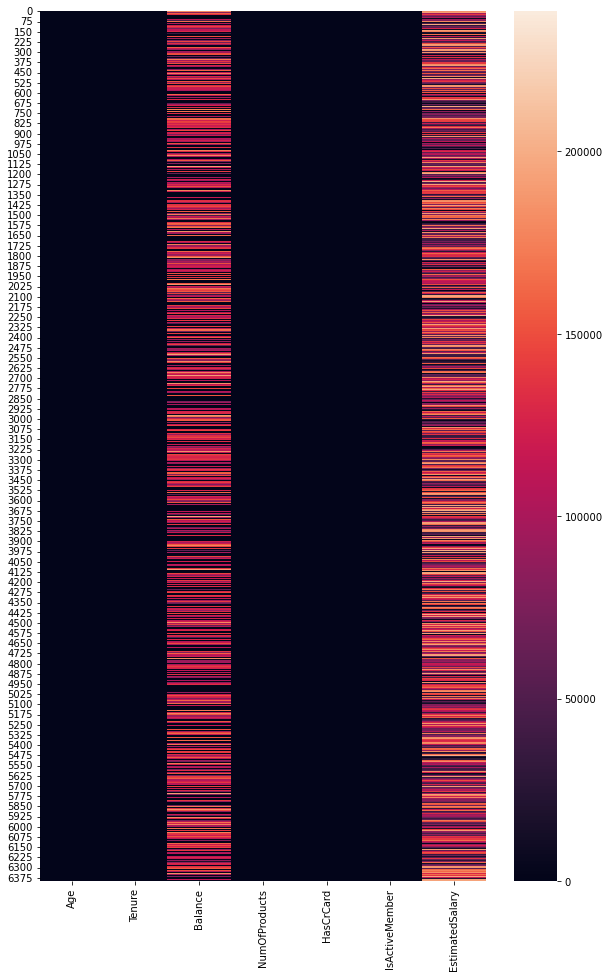

In [11]:
plt.figure(figsize=(10, 16))
sns.heatmap(train[['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']] )

In [12]:
train.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1
1,7129,15690372,Henry,553,Spain,Male,38,1,181110.13,2,1,0,184544.59,0
2,4083,15669301,Romani,778,Germany,Female,29,6,150358.97,1,1,0,62454.01,1


<AxesSubplot:xlabel='Geography', ylabel='Age'>

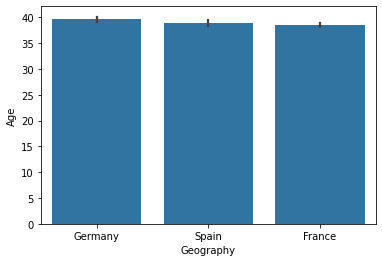

In [13]:
sns.barplot(data = train , x = 'Geography' , y = 'Age')

In [14]:
from scipy import stats

<AxesSubplot:>

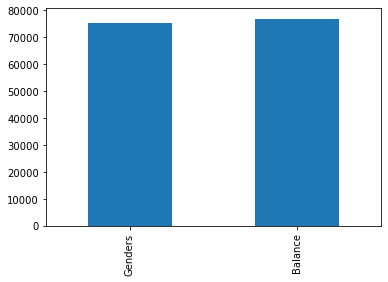

In [15]:
(
   train
  .groupby('Gender')['Balance'].mean()
  .set_axis(['Genders' , 'Balance'] , axis = 0)
  .plot(kind = 'bar')

)

In [16]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<AxesSubplot:>

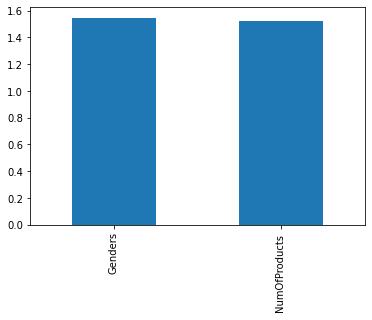

In [17]:
(
   train
  .groupby('Gender')['NumOfProducts'].mean()
  .set_axis(['Genders','NumOfProducts '] , axis = 0)
  .plot(kind = 'bar')

)

In [18]:
train.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


C:\Users\win10\AppData\Local\Temp/ipykernel_14056/351826913.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CreditScore'], kde = False)


<AxesSubplot:xlabel='CreditScore'>

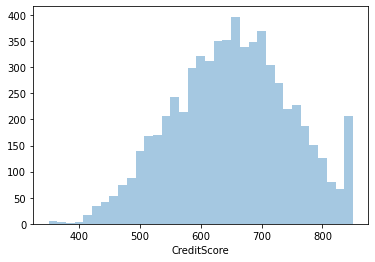

In [19]:
sns.distplot(train['CreditScore'], kde = False)

In [20]:
train.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2580,15597896,Ozoemena,365,Germany,Male,30,0,127760.07,1,1,0,81537.85,1


In [21]:
trains = ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [22]:
trains

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [23]:
dfg = train[trains]

In [24]:
cor = dfg.corr(method='pearson')

In [25]:
cor

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003227,-0.002797,0.008093,0.025163,-0.018183,0.020058,-0.002031,-0.028383
Age,-0.003227,1.000000,-0.001657,0.021437,-0.035967,-0.017947,0.094476,-0.007548,0.278809
Tenure,-0.002797,-0.001657,1.000000,-0.005990,0.016807,0.018528,-0.019457,0.021738,-0.009469
Balance,0.008093,0.021437,-0.005990,1.000000,-0.300809,-0.012981,-0.032976,0.010088,0.119943
NumOfProducts,0.025163,-0.035967,0.016807,-0.300809,1.000000,0.005625,0.009174,0.006017,-0.048684
HasCrCard,-0.018183,-0.017947,0.018528,-0.012981,0.005625,1.000000,-0.019598,-0.010739,-0.002699
IsActiveMember,0.020058,0.094476,-0.019457,-0.032976,0.009174,-0.019598,1.000000,-0.022356,-0.148096
EstimatedSalary,-0.002031,-0.007548,0.021738,0.010088,0.006017,-0.010739,-0.022356,1.000000,0.002585
Exited,-0.028383,0.278809,-0.009469,0.119943,-0.048684,-0.002699,-0.148096,0.002585,1.000000


<AxesSubplot:>

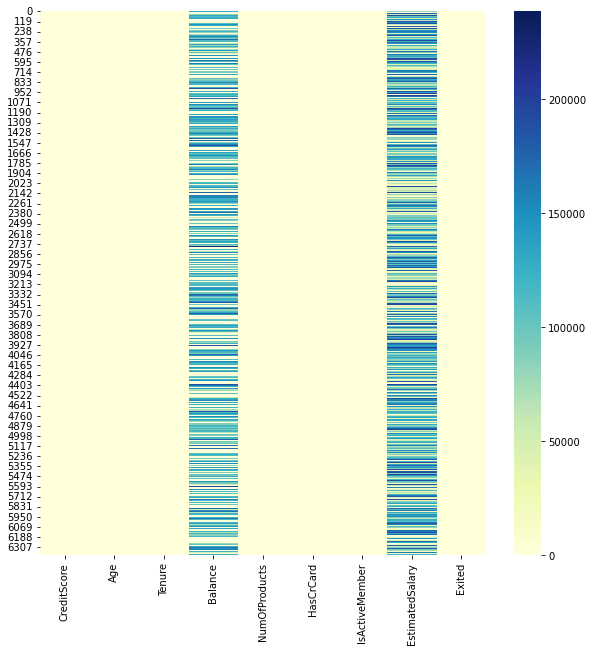

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(dfg, cmap="YlGnBu")